In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [29]:
# Loaad training data 
train = pd.read_csv("dataset/train.csv")
# train.describe(include="all")
train.head(5)
train.columns
# train.isna().sum()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [31]:
# Test Data
test = pd.read_csv("dataset/test.csv")
# Check data
# test.describe(include="all")
test.isna().sum()
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


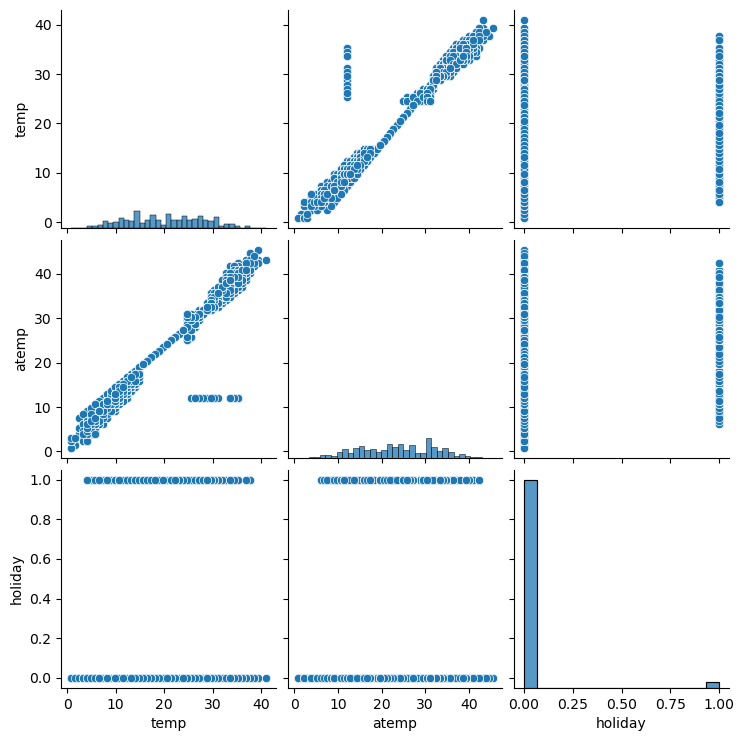

In [33]:
# Visualize data using pairplot
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train[["temp", "atemp", "holiday"]])
plt.show()

In [34]:
columns_drop = ["count",'casual', 'registered', 'datetime']
X = train.drop(columns_drop, axis=1)
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

In [37]:
y = train[["datetime", "count"]]
print(y_test)

NameError: name 'y_test' is not defined

In [39]:
# Convert dattime to float
y["datetime"] = pd.to_datetime(y["datetime"])
y["datetime"] = y["datetime"].astype('int64') / 10**9

/var/folders/x_/lqwxtxdd1p50j7b04rgvx2sw0000gn/T/ipykernel_16528/2669708421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["datetime"] = pd.to_datetime(y["datetime"])
/var/folders/x_/lqwxtxdd1p50j7b04rgvx2sw0000gn/T/ipykernel_16528/2669708421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["datetime"] = y["datetime"].astype('int64') / 10**9


In [41]:
# MSE and split to avoid bias
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Check 
print(X)

# Create Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train Model 
model.fit(X_train, y_train)
print(model)

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  
0         0.0000  
1         0.0000  
2         0.0000  
3         0.0000  
4         0.0000  
...          ...  
10

In [44]:
test_without_datetime = test.drop(["datetime"], axis=1)

In [45]:
pred = model.predict(test_without_datetime)
print(pred)

[[1.31937550e+09 1.09639667e+02]
 [1.31640002e+09 5.72700000e+01]
 [1.31640002e+09 5.72700000e+01]
 ...
 [1.32378961e+09 6.62885000e+01]
 [1.31715767e+09 9.70166667e+01]
 [1.30740082e+09 2.03883333e+01]]


In [49]:
# Handle negative values prediction 
# Post-process predictions to handle negative values
from sklearn.metrics import mean_squared_error
pred = np.maximum(pred, 0)

In [51]:
predictions = pred[:, 1]

In [53]:
submission = pd.DataFrame({
    'datetime': test['datetime'],
    'count': predictions
})
# Save the submission file
submission.to_csv('submission.csv', index=False)